In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
city_weather=[]
city_lat=[]
lat_lngs = []
cities = []


lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

615

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | tiznit
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | santa maria
Processing Record 12 of Set 1 | omboue
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | acajutla
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | okhotsk
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | bel

Processing Record 30 of Set 4 | naze
Processing Record 31 of Set 4 | moron
Processing Record 32 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 4 | lolua
City not found. Skipping...
Processing Record 35 of Set 4 | warqla
City not found. Skipping...
Processing Record 36 of Set 4 | carauari
Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | padang
Processing Record 39 of Set 4 | muyezerskiy
Processing Record 40 of Set 4 | half moon bay
Processing Record 41 of Set 4 | gamba
Processing Record 42 of Set 4 | salinopolis
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | butaritari
Processing Record 47 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 48 of Set 4 | fukuma
Processing Record 49 of Set 4 | salamiyah
Processing Record 0 of Set 5

Processing Record 16 of Set 8 | nagato
Processing Record 17 of Set 8 | sibolga
Processing Record 18 of Set 8 | teguldet
Processing Record 19 of Set 8 | yeppoon
Processing Record 20 of Set 8 | husavik
Processing Record 21 of Set 8 | necochea
Processing Record 22 of Set 8 | saint anthony
Processing Record 23 of Set 8 | stokmarknes
Processing Record 24 of Set 8 | kaitangata
Processing Record 25 of Set 8 | guanay
Processing Record 26 of Set 8 | skovde
City not found. Skipping...
Processing Record 27 of Set 8 | college
Processing Record 28 of Set 8 | takoradi
Processing Record 29 of Set 8 | brae
Processing Record 30 of Set 8 | ovejas
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | haines junction
Processing Record 33 of Set 8 | abatskoye
Processing Record 34 of Set 8 | uspenka
Processing Record 35 of Set 8 | leh
Processing Record 36 of Set 8 | hearst
Processing Record 37 of Set 8 | gilgit
Processing Record 38 of Set 8 | juli
Processing Record 39 of Set 8 | kisan

Processing Record 5 of Set 12 | alofi
Processing Record 6 of Set 12 | sokolovo
Processing Record 7 of Set 12 | alekseyevka
Processing Record 8 of Set 12 | cayenne
Processing Record 9 of Set 12 | srednekolymsk
Processing Record 10 of Set 12 | maceio
Processing Record 11 of Set 12 | helong
Processing Record 12 of Set 12 | bathsheba
Processing Record 13 of Set 12 | ituni
City not found. Skipping...
Processing Record 14 of Set 12 | kouroussa
Processing Record 15 of Set 12 | namtsy
Processing Record 16 of Set 12 | san juan nepomuceno
Processing Record 17 of Set 12 | itarema
Processing Record 18 of Set 12 | opunake
Processing Record 19 of Set 12 | hambantota
Processing Record 20 of Set 12 | verkhnevilyuysk
Processing Record 21 of Set 12 | sarkand
Processing Record 22 of Set 12 | chepareria
Processing Record 23 of Set 12 | uwayl
City not found. Skipping...
Processing Record 24 of Set 12 | nabul
City not found. Skipping...
Processing Record 25 of Set 12 | kazalinsk
City not found. Skipping...


In [4]:
city_df=pd.DataFrame(city_data)
city_df.to_csv("city.csv",index=False)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,12.31,88,100,17.72,RU,1648122229
1,cabo san lucas,22.8909,-109.9124,68.50,30,0,3.49,MX,1648122266
2,dunedin,-45.8742,170.5036,55.80,80,53,1.61,NZ,1648122557
3,rikitea,-23.1203,-134.9692,78.76,74,98,16.33,PF,1648122815
4,khatanga,71.9667,102.5000,0.77,96,100,6.40,RU,1648122815
...,...,...,...,...,...,...,...,...,...
549,maine-soroa,13.2114,12.0241,96.66,10,19,15.66,NE,1648122972
550,hovd,48.0056,91.6419,22.86,24,69,8.81,MN,1648122972
551,portland,45.5234,-122.6762,42.91,93,75,4.00,US,1648122973
552,moree,-29.4667,149.8500,73.42,60,40,11.50,AU,1648122495


In [5]:
over_humidity_df = city_df.loc[city_df["Humidity"] > 100]
over_humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


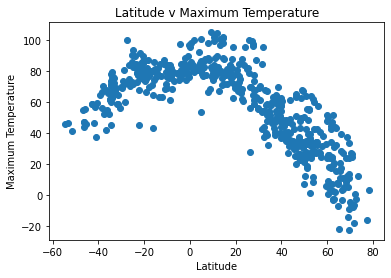

In [6]:
x_1 = city_df['Lat']
y_1 = city_df['Max Temp']
plt.scatter(x_1,y_1)
plt.title("Latitude v Maximum Temperature")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.show()

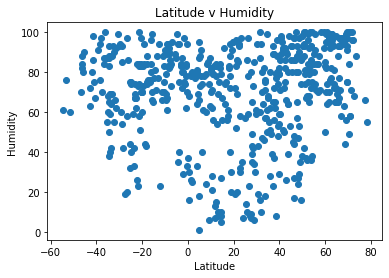

In [7]:
x_2 = city_df['Lat']
y_2 = city_df['Humidity']
plt.scatter(x_2,y_2)
plt.title("Latitude v Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

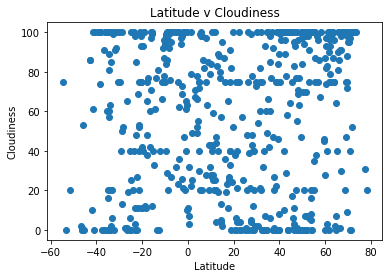

In [8]:
x_3 = city_df['Lat']
y_3 = city_df['Cloudiness']
plt.scatter(x_3,y_3)
plt.title("Latitude v Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

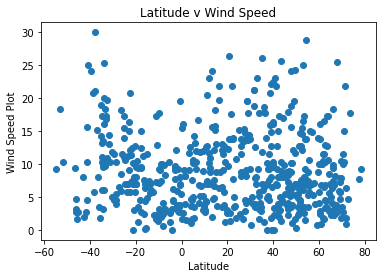

In [9]:
x_4 = city_df['Lat']
y_4 = city_df['Wind Speed']
plt.scatter(x_4,y_4)
plt.title("Latitude v Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed Plot')
plt.show()

In [10]:
northern_hemisphere=city_df.loc[city_df["Lat"] > 0]
southern_hemisphere=city_df.loc[city_df["Lat"] < 0]

In [11]:
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,12.31,88,100,17.72,RU,1648122229
1,cabo san lucas,22.8909,-109.9124,68.50,30,0,3.49,MX,1648122266
4,khatanga,71.9667,102.5000,0.77,96,100,6.40,RU,1648122815
6,talnakh,69.4865,88.3972,11.21,93,98,7.94,RU,1648122540
7,tiznit,29.5833,-9.5000,55.83,59,73,14.47,MA,1648122816
...,...,...,...,...,...,...,...,...,...
548,tazmalt,36.3868,4.3989,62.98,49,77,6.69,DZ,1648122972
549,maine-soroa,13.2114,12.0241,96.66,10,19,15.66,NE,1648122972
550,hovd,48.0056,91.6419,22.86,24,69,8.81,MN,1648122972
551,portland,45.5234,-122.6762,42.91,93,75,4.00,US,1648122973


In [12]:
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,dunedin,-45.8742,170.5036,55.80,80,53,1.61,NZ,1648122557
3,rikitea,-23.1203,-134.9692,78.76,74,98,16.33,PF,1648122815
5,punta arenas,-53.1500,-70.9167,46.51,76,0,18.41,CL,1648122815
8,hithadhoo,-0.6000,73.0833,83.84,70,10,19.57,MV,1648122816
9,santa maria,-29.6842,-53.8069,69.10,94,75,4.61,BR,1648122817
...,...,...,...,...,...,...,...,...,...
520,silvania,-16.6589,-48.6081,71.28,76,60,11.23,BR,1648122964
524,rocha,-34.4833,-54.3333,71.42,88,89,9.62,UY,1648122965
536,cooma,-36.2333,149.1333,55.17,100,100,3.44,AU,1648122968
546,rengo,-34.4167,-70.8667,44.92,50,0,3.13,CL,1648122967


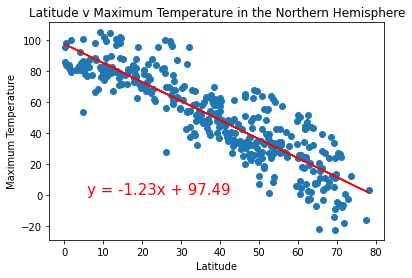

In [13]:
x_1n = northern_hemisphere["Lat"]
y_1n = northern_hemisphere["Max Temp"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(x_1n, y_1n)
regress_1n = x_1n * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))
plt.scatter(x_1n,y_1n)
plt.plot(x_1n,regress_1n,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude v Maximum Temperature in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.show()

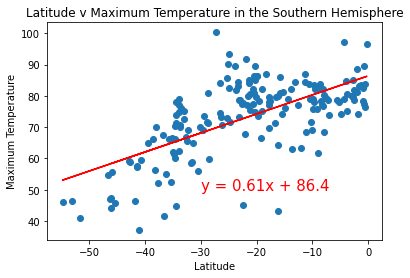

In [14]:
x_1s = southern_hemisphere["Lat"]
y_1s = southern_hemisphere["Max Temp"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(x_1s, y_1s)
regress_1s = x_1s * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))
plt.scatter(x_1s,y_1s)
plt.plot(x_1s,regress_1s,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title("Latitude v Maximum Temperature in the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.show()

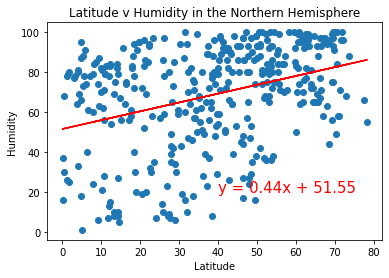

In [15]:
x_2n = northern_hemisphere["Lat"]
y_2n = northern_hemisphere["Humidity"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(x_2n, y_2n)
regress_2n = x_2n * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))
plt.scatter(x_2n,y_2n)
plt.plot(x_2n,regress_2n,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Latitude v Humidity in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

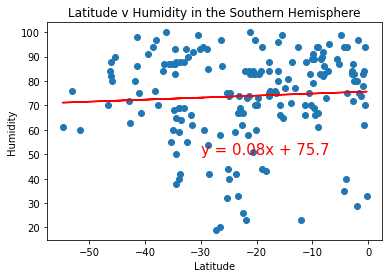

In [16]:
x_2s = southern_hemisphere["Lat"]
y_2s = southern_hemisphere["Humidity"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(x_2s, y_2s)
regress_2s = x_2s * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))
plt.scatter(x_2s,y_2s)
plt.plot(x_2s,regress_2s,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title("Latitude v Humidity in the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

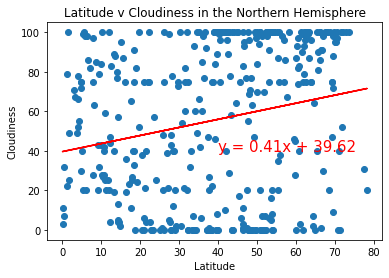

In [17]:
x_3n = northern_hemisphere["Lat"]
y_3n = northern_hemisphere["Cloudiness"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(x_3n, y_3n)
regress_3n = x_3n * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))
plt.scatter(x_3n,y_3n)
plt.plot(x_3n,regress_3n,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title("Latitude v Cloudiness in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

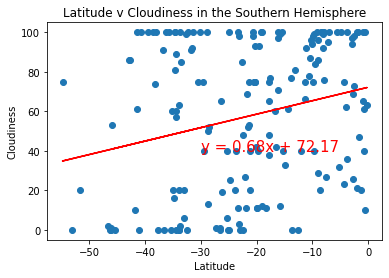

In [18]:
x_3s = southern_hemisphere["Lat"]
y_3s = southern_hemisphere["Cloudiness"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(x_3s, y_3s)
regress_3s = x_3s * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))
plt.scatter(x_3s,y_3s)
plt.plot(x_3s,regress_3s,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Latitude v Cloudiness in the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

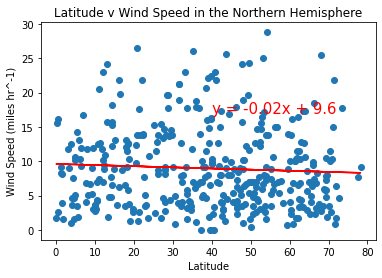

In [19]:
x_4n = northern_hemisphere["Lat"]
y_4n = northern_hemisphere["Wind Speed"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(x_4n, y_4n)
regress_4n = x_4n * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))
plt.scatter(x_4n,y_4n)
plt.plot(x_4n,regress_4n,"r-")
plt.annotate(line_eq,(40,17),fontsize=15,color="red")
plt.title("Latitude v Wind Speed in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (miles hr^-1)')
plt.show()

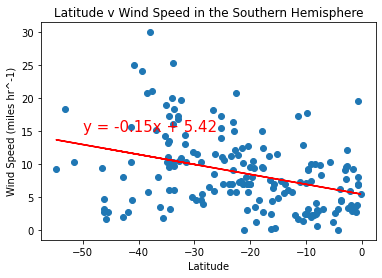

In [20]:
x_4s = southern_hemisphere["Lat"]
y_4s = southern_hemisphere["Wind Speed"]
(gradient, y_intercept, rvalue, pvalue, stderr) = linregress(x_4s, y_4s)
regress_4s = x_4s * gradient + y_intercept
line_eq = "y = " + str(round(gradient,2)) + "x + " + str(round(y_intercept,2))
plt.scatter(x_4s,y_4s)
plt.plot(x_4s,regress_4s,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.title("Latitude v Wind Speed in the Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (miles hr^-1)')
plt.show()

In [21]:
#We can observe that the maximum temperature is at the highest when it is at the equator and it gets lower as it head towards the poles (North and South Poles). This evident considering the facts that Antarctica and the Arctic are some of the coldest areas on the Earth.

#The cloudiness gets higher as it head towards the far North considering we can see trends increasing on both Latitude v Cloudiness graphs on the Northern and Southern hemispheres provided with their positive gradients.

#The correlations of latitude vs humidity, cloudiness and wind speed have a very weak correlation since the points are scattered whilst compared to latitude vs max temperature which has a very strong correlation since the graphs have points very close to each other. This is due to the three except for maximum temperature varying between countries.